# Multiple Linear Regression with Birtweight Data

In [199]:
%reset
import pandas as pd
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

In [208]:
from statsmodels.formula.api import ols

# Indicator Variables

New data of babies birth weight, gestational age, and mother's smoking behavior, n= 32.

Example:   Is an infant's birthweight associated with the mother's smoking status (yes or no) during pregnancy?

Smoking is s qualitative or categorical predictor, a binary variable.  

In [209]:
birthweight=pd.read_csv('BirthWeight.csv')
birthweight

,Birthweight_g,Gestational_age_weeks,Mother_Smokes
0,2940,38,yes
1,3130,38,no
2,2420,36,yes
3,2450,34,no
4,2760,39,yes
5,2440,35,yes
6,3226,40,no
7,3301,42,yes
8,2729,37,no
9,3410,40,no


In [210]:
# You can code the yes/no string to a dummy or indicator variable or 1/0 to use as a model variable.  

#  You do not have to dummy code a binary variable to binary number to use a predictor with ols:  it will dummmy code it for you.  You get the same output either way.

birthweightD=pd.get_dummies(birthweight,drop_first=True,dtype='int')
birthweightD

,Birthweight_g,Gestational_age_weeks,Mother_Smokes_yes
0,2940,38,1
1,3130,38,0
2,2420,36,1
3,2450,34,0
4,2760,39,1
5,2440,35,1
6,3226,40,0
7,3301,42,1
8,2729,37,0
9,3410,40,0


In [203]:
# We have changed the Mother_Smokes variable into an intteger from an object
birthweightD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Birthweight_g          32 non-null     int64
 1   Gestational_age_weeks  32 non-null     int64
 2   Mother_Smokes_yes      32 non-null     int32
dtypes: int32(1), int64(2)
memory usage: 768.0 bytes


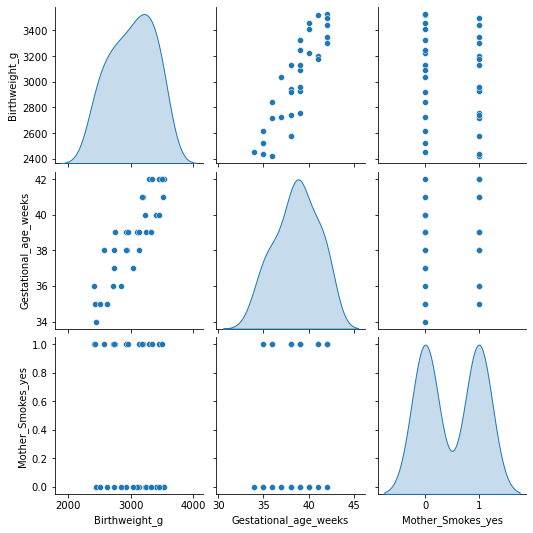

In [204]:
sns.pairplot(birthweightD,diag_kind='kde')

#  what can we see from visualizing the data:  here using a scatterplot matrix?
#  Positive linear association between birthweight and gestatational age.  Can't really determine the relationship between birthweight and smoking status.  

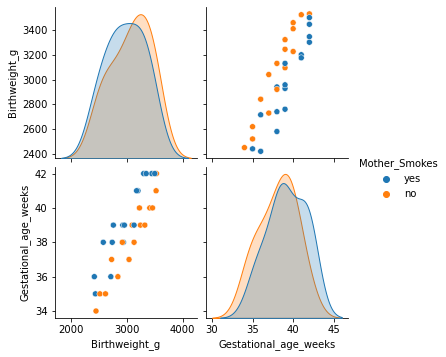

In [205]:
#  can use the hue for a object category to show the faceted relationship between Mother_Smokes and Birthweight, which better indicates that their may be an association
# even after adjusting for the large influence of gestational age
sns.pairplot(birthweight,hue="Mother_Smokes",diag_kind='kde')

Aftre taking into account gestational age, is there a significant differnece in the (average) birthweight of infants born to mothers who do or do not smoke?

y = (b0 +b1x1 +b2x2)

y = birthweight  
x1 = gestational age of baby
x2 = mother's smoking status

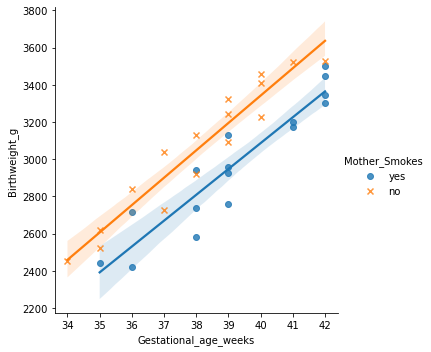

In [206]:
# The lm plot in seaborn allows you to see the regression line and 95% confidence interval of birthweight regressed on gestational age, divided out for those mother's who smoked or not. 
#  It appears that the birthweight for babies with mother's who did not smoke is higher than those who did smoke.  

sns.lmplot(x='Gestational_age_weeks',y='Birthweight_g',hue='Mother_Smokes',data=birthweight,markers=['o','x'])

In [207]:
model10=ols('Birthweight_g~Gestational_age_weeks+Mother_Smokes',data=birthweight)
results10=model10.fit()
print(results10.summary2())

NameError: name 'ols' is not defined

Regression Equation  
y = BirthWeight = -2390 + 143 * GestatationalAge - 244.5 * MotherSmokes[T.yes]

When MotherSmokes=0 then Birthweight = -2390 + 143 * GestationalAge

When MotherSmokes=1 then Birthweight = -2390 + 143 * GestationalAge - 244.5 * 1 = -2634.5 + 143 * GestationalAge

The difference betweeen the two lines is the differnece in birthweight for a fixed gestational age going from mothers who do not smoke to mothers who do smoke (going from No to Yes or 0 to 1). 

Is baby's birth weight related to smoking during pregnancy, after taking into account length of gestation?

Yes, There is sufficient evidence to conclude that there is a statistically significant difference in the mean birth weight of all babies of smoking mothers and the mean birth weight of babies of all non-smoking mothers, after taking into account length of gestation.

There is an advantage to poooling the data instead of running sepearte analysis fro the two groups.  
* decreases the stanadrd errors of the coefficients and the residual standard error of the regression (smaller confidnece intervals)
* allows you to test the hypotheiss of the association of smoking status on birthweight, after taking into account the influence of gestational age.  This happens all togteher with MLR.  

The effect of b1 is the influnece of gestational age on birthweight for both smoking groups (the change in the mean response of birthweiht for each additional week of gestational age).  This is assuming that the influence of gestational age on birthweight (the slppe) is equal between the two smoking groups.  This assumptions seems to hold as can be seen by the parallel lines the regession model.  If these were not equal, then you would think that an interaction is happening between the predictor variables: that the effect of gestational age on birthweight is different between the smokimg groups.  With an interaction, the effect of gestational age on birtweight would depend on the smoking status of the mother.  

In [193]:
birthweightYESSmoke=birthweight.drop(birthweight[birthweight.Mother_Smokes=="no"].index)
birthweightNoSmoke=birthweight.drop(birthweight[birthweight.Mother_Smokes=="yes"].index)
#birthweightYESSmoke

In [194]:
model11=ols('Birthweight_g~Gestational_age_weeks',data=birthweightYESSmoke)
results11=model11.fit()
print(results11.summary2())

                       Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.865   
Dependent Variable:      Birthweight_g        AIC:                    202.1772
Date:                    2022-07-20 11:39     BIC:                    203.7223
No. Observations:        16                   Log-Likelihood:         -99.089 
Df Model:                1                    F-statistic:            97.04   
Df Residuals:            14                   Prob (F-statistic):     1.12e-07
R-squared:               0.874                Scale:                  16022.  
------------------------------------------------------------------------------
                        Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
------------------------------------------------------------------------------
Intercept             -2474.5641 553.9725 -4.4669 0.0005 -3662.7169 -1286.4114
Gestational_age_weeks   139.0287  14.1134  9.8509 0.0000   108.7586   169.29

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [195]:
model12=ols('Birthweight_g~Gestational_age_weeks',data=birthweightNoSmoke)
results12=model12.fit()
print(results12.summary2())

                       Results: Ordinary least squares
Model:                   OLS                  Adj. R-squared:         0.909   
Dependent Variable:      Birthweight_g        AIC:                    196.7796
Date:                    2022-07-20 11:39     BIC:                    198.3248
No. Observations:        16                   Log-Likelihood:         -96.390 
Df Model:                1                    F-statistic:            151.1   
Df Residuals:            14                   Prob (F-statistic):     6.85e-09
R-squared:               0.915                Scale:                  11434.  
------------------------------------------------------------------------------
                        Coef.    Std.Err.    t    P>|t|    [0.025     0.975]  
------------------------------------------------------------------------------
Intercept             -2546.1379 457.2930 -5.5678 0.0001 -3526.9338 -1565.3420
Gestational_age_weeks   147.2069  11.9741 12.2938 0.0000   121.5251   172.88

C:\Users\carol\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The model here assumues that the 